In [10]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn

In [2]:
df= pd.read_excel('Sylhet Water Level and Rainfall.xlsx',sheet_name=0)
df.head()

,Date,Raw,Corrected mPWD
0,1980-01-01 12:00:00,3.18,2.57
1,1980-01-02 12:00:00,3.17,2.56
2,1980-01-03 12:00:00,3.15,2.54
3,1980-01-04 12:00:00,3.13,2.52
4,1980-01-05 12:00:00,3.12,2.51


In [3]:
df.dtypes

Date              datetime64[ns]
Raw                      float64
Corrected mPWD           float64
dtype: object

In [4]:
df.set_index('Date')

,Raw,Corrected mPWD
Date,,
1980-01-01 12:00:00,3.18,2.57
1980-01-02 12:00:00,3.17,2.56
1980-01-03 12:00:00,3.15,2.54
1980-01-04 12:00:00,3.13,2.52
1980-01-05 12:00:00,3.12,2.51
...,...,...
2022-06-30 06:00:00,10.76,11.22
2022-06-30 09:00:00,10.76,11.22
2022-06-30 12:00:00,10.77,11.23


In [5]:
df = df.drop('Raw', axis = 1)
df.head()

,Date,Corrected mPWD
0,1980-01-01 12:00:00,2.57
1,1980-01-02 12:00:00,2.56
2,1980-01-03 12:00:00,2.54
3,1980-01-04 12:00:00,2.52
4,1980-01-05 12:00:00,2.51


In [6]:
df['Corrected mPWD'] = df['Corrected mPWD'].to_numpy()
df1 = df.resample('M', on='Date').agg(np.mean)
df1.head()

,Corrected mPWD
Date,
1980-01-31,2.325161
1980-02-29,2.006897
1980-03-31,2.381935
1980-04-30,3.953667
1980-05-31,7.854516


In [17]:
df1.to_excel("WL_mean_monthly_SurmaRiver.xlsx")

In [23]:
df2= pd.read_excel('WL_mean_monthly_SurmaRiver - Copy.xlsx',sheet_name=0)
df2.tail()

,Date,Month,Corrected mPWD
499,2021-08-31,August,9.952710
500,2021-09-30,September,7.722467
501,2021-10-31,October,5.953935
502,2021-11-30,November,3.828200
503,2021-12-31,December,2.646194


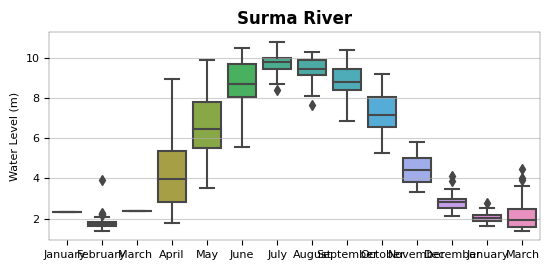

In [26]:
# plt.rcParams["figure.figsize"] = [5.6, 2.8]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(1,1, squeeze= True)

seaborn.boxplot (x = df2['Month'], y = df2['Corrected mPWD'],
                ax = ax)

plt.title("Surma River", fontweight = 'semibold')
plt.xlabel('')
plt.ylabel('Water Level (m)', fontsize=8)
# plt.yticks(list(np.arange(6.5, 9, .5)), alpha=1)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(visible = True, axis = 'y',  alpha = 0.6)
plt.tight_layout()
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_linewidth(0.2)
plt.savefig("WL_Box_plot_SurmaRiver_1980_2022.png", dpi=500)